In [3]:
!unzip parsed_patient_data.zip

Archive:  parsed_patient_data.zip
  inflating: parsed_patient_data.csv  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


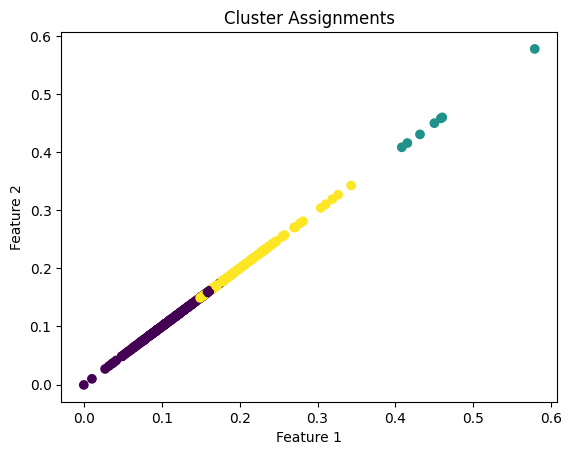

Epoch 1/10
9/9 [==============================] - 1s 36ms/step - loss: 21427.6953 - mae: 136.8403 - val_loss: 20777.2422 - val_mae: 132.2366
Epoch 2/10
9/9 [==============================] - 0s 11ms/step - loss: 17170.8242 - mae: 119.8871 - val_loss: 16136.6709 - val_mae: 114.1319
Epoch 3/10
9/9 [==============================] - 0s 9ms/step - loss: 13152.4971 - mae: 102.4944 - val_loss: 12124.4424 - val_mae: 97.2672
Epoch 4/10
9/9 [==============================] - 0s 10ms/step - loss: 9882.8467 - mae: 86.8109 - val_loss: 9193.1768 - val_mae: 85.6498
Epoch 5/10
9/9 [==============================] - 0s 9ms/step - loss: 7764.4609 - mae: 74.6112 - val_loss: 7515.2031 - val_mae: 77.3318
Epoch 6/10
9/9 [==============================] - 0s 11ms/step - loss: 6770.2754 - mae: 67.0496 - val_loss: 6901.6255 - val_mae: 72.4896
Epoch 7/10
9/9 [==============================] - 0s 12ms/step - loss: 6441.9331 - mae: 63.8249 - val_loss: 6833.6528 - val_mae: 70.5287
Epoch 8/10
9/9 [================

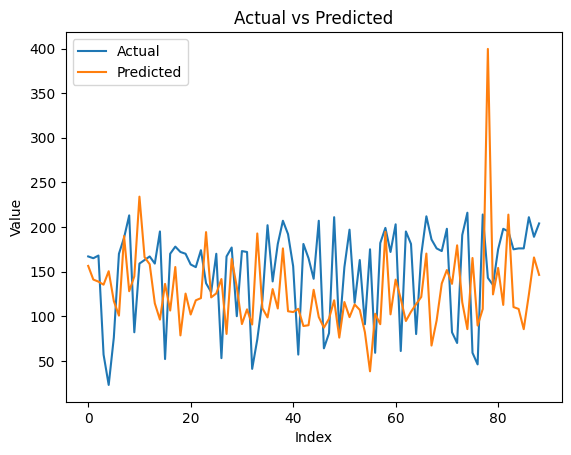

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pickle

# Load data
df = pd.read_csv("parsed_patient_data.csv")

# Separate features (X) and labels (y)
y = df["0"]
X = df.drop("0", axis=1)

# Cluster the data
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust the number of clusters as needed
cluster_assignments = kmeans.fit_predict(X)

# Visualize clusters (2D plot)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_assignments, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Assignments')
plt.show()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale features
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler
with open("min_max_scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

# Convert data to TensorFlow constants if needed
X_train = tf.constant(X_train_scaled, dtype=tf.float32)
X_test = tf.constant(X_test_scaled, dtype=tf.float32)
y_train = tf.constant(y_train.values, dtype=tf.float32)
y_test = tf.constant(y_test.values, dtype=tf.float32)

# Now you can continue with modeling and evaluation steps
# For example:

# Define and compile your model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print("Test Mean Absolute Error:", mae)

# Make predictions
predictions = model.predict(X_test)

# Plot actual vs predicted
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


36.0
146.0902934537246
Epoch 1/100
9/9 [==============================] - 2s 41ms/step - loss: 137.4041 - mae: 137.4041 - val_loss: 137.6857 - val_mae: 137.6857 - lr: 0.0010
Epoch 2/100
9/9 [==============================] - 0s 14ms/step - loss: 109.7286 - mae: 109.7286 - val_loss: 133.2482 - val_mae: 133.2482 - lr: 0.0010
Epoch 3/100
9/9 [==============================] - 0s 13ms/step - loss: 94.4331 - mae: 94.4331 - val_loss: 133.7553 - val_mae: 133.7553 - lr: 0.0010
Epoch 4/100
9/9 [==============================] - 0s 14ms/step - loss: 94.5370 - mae: 94.5370 - val_loss: 133.8841 - val_mae: 133.8841 - lr: 0.0010
Epoch 5/100
9/9 [==============================] - 0s 12ms/step - loss: 91.2078 - mae: 91.2078 - val_loss: 133.2455 - val_mae: 133.2455 - lr: 0.0010
Epoch 6/100
9/9 [==============================] - 0s 12ms/step - loss: 89.8306 - mae: 89.8306 - val_loss: 132.6196 - val_mae: 132.6196 - lr: 0.0010
Epoch 7/100
9/9 [==============================] - 0s 14ms/step - loss: 88.2455

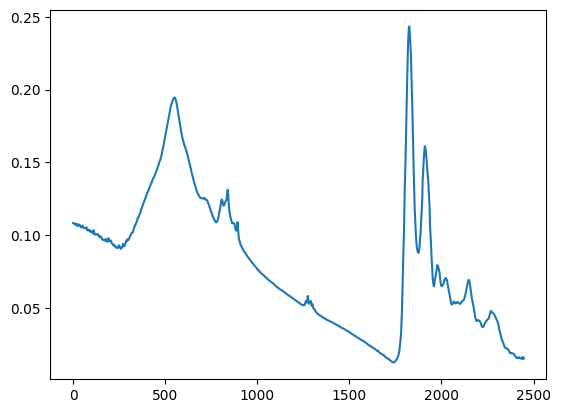

In [5]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
# from tensorflow.keras.layers import BatchNormalization, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
import matplotlib.pyplot as plt

df = pd.read_csv("parsed_patient_data.csv")
y = df["0"]
X = df.drop("0", axis=1)

# vizualize data
import tensorflow as tf
import matplotlib.pyplot as plt

def visualize(index):
  print(y[index])
  plt.plot(X.loc[index].tolist())

visualize(7)


import matplotlib.pyplot as plt

def plot_actual_vs_predicted(model):
    df_sorted = df.sort_values(by="0")

    y_sorted = df_sorted["0"]
    X_sorted = df_sorted.drop("0", axis=1)

    predictions = model.predict(X_sorted)

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(y_sorted.array, label='Actual')
    ax.plot(predictions, label='Predicted')

    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    ax.set_title('Actual vs Predicted')
    ax.legend()

    ax.grid(True)

    plt.show()

y_array = y.array
y_avg = sum(y_array) / len(y_array)
# print(y_avg)
preds = []

for item in y_array:
  preds.append(abs(item - y_avg))

sum(preds) / len(preds)

import tensorflow as tf
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)






# Neural Network Model
tf.random.set_seed(50)

model = tf.keras.Sequential([
    BatchNormalization(input_shape=(X_train.shape[1],)),
    Dense(100, activation='relu'),
    Dropout(0.2),  # Dropout regularization
    Dense(50, activation='relu'),
    Dropout(0.1),  # Dropout regularization
    Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),  # Using Adam optimizer for better convergence
              metrics=["mae"])


# Learning rate scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6)

# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])